#Assignments for Notebook 3
---

# Excercise 3.1
You are expecting some kind of correlation between all factors related to the "acidity" on the "winequality-red" dataset. Let's say you will consider "pH", "fixed acidity", "volatile acidity" and "citric acid".
- Make 3 vertical standalone boxplots on the same output for these 3 variables to see how they behave individually.
- Make vertical boxplots for the same variables, on the same plot for comparison.
- Plot the same boxplots on a logarithmic scale to see if you can distinguish some minor differences better.

Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

###HINTS:
- Start by importing the different modules you think you'll need.
- Create a dataframe from the URL
- Modify the dataframe so that it only includes the 3 variables you want (you can check notebook 1 if you don't remember how to do this)
- Make the boxplots using the integrated pandas method `df.plot`, and display them on a single row.
- Make these boxplots again using seaborn to show both of them on the same plot, using the same scale.
- Finally, make logarithmic plots on another cell, using the same library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
# df1=df1[["chlorides", "sulphates", "density"]]
df1=df1[["pH", "fixed acidity", "volatile acidity", "citric acid"]]
df1

,pH,fixed acidity,volatile acidity,citric acid
0,3.51,7.4,0.700,0.00
1,3.20,7.8,0.880,0.00
2,3.26,7.8,0.760,0.04
3,3.16,11.2,0.280,0.56
4,3.51,7.4,0.700,0.00
...,...,...,...,...
1594,3.45,6.2,0.600,0.08
1595,3.52,5.9,0.550,0.10
1596,3.42,6.3,0.510,0.13
1597,3.57,5.9,0.645,0.12


pH                     Axes(0.125,0.11;0.168478x0.77)
fixed acidity       Axes(0.327174,0.11;0.168478x0.77)
volatile acidity    Axes(0.529348,0.11;0.168478x0.77)
citric acid         Axes(0.731522,0.11;0.168478x0.77)
dtype: object

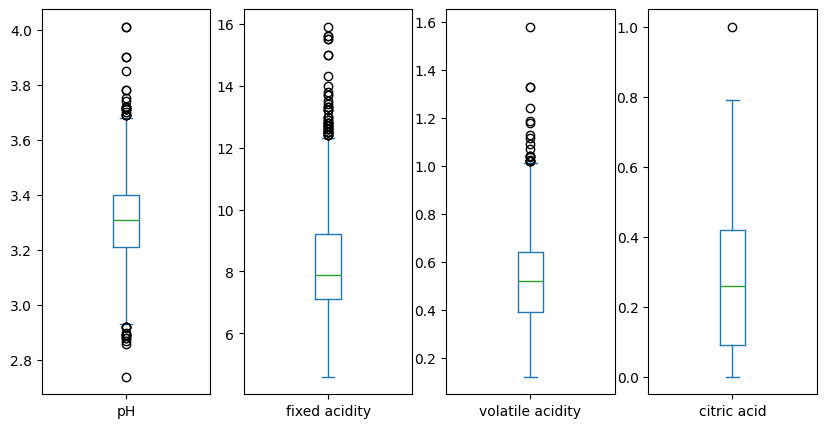

In [2]:
df1.plot(kind='box',subplots=True,layout=(1,4),figsize=(10,5))

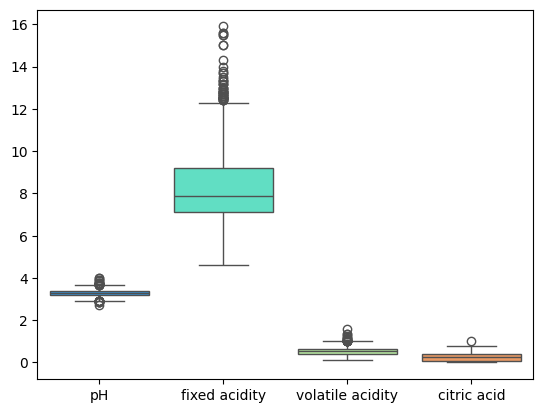

In [3]:
ax = sns.boxplot(data=df1, orient="v", palette="rainbow")

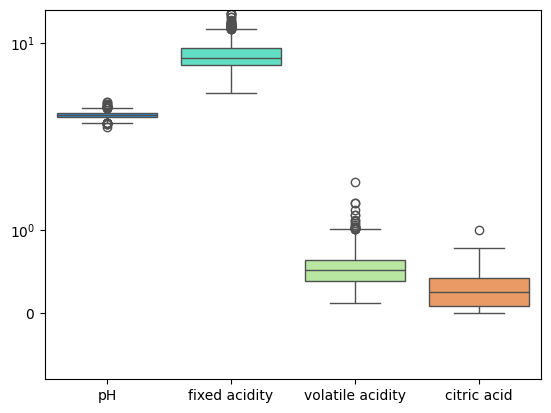

In [4]:
ax = sns.boxplot(data=df1, orient="v", palette="rainbow")
ax.set_yscale('symlog')

#Excercise 3.2
For this exercise, use the dataframe you used on exercise 1. Let's say you want to analyze in which way some type of acidity on the dataset correlates with citric acid.
- Make a small heatmap to observe different correlations between all the variables
- Choose one (or many) correlations for citric acid by observing the heatplot, then make a jointplot relating citric acid and some type of acidity, see if it's worth the effort.

<Axes: >

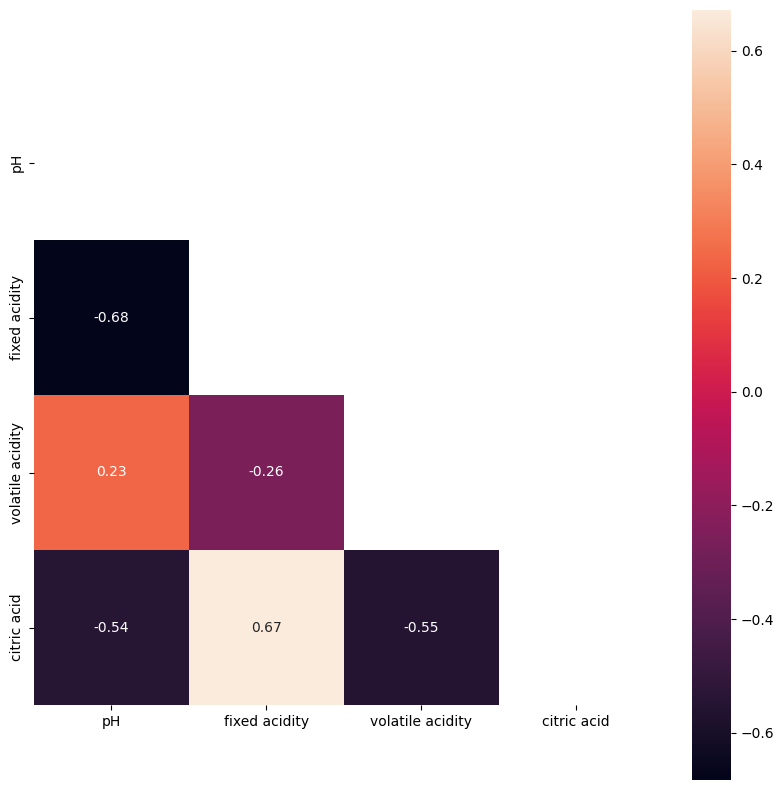

In [5]:
import pandas as pd
import seaborn as sns

df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
# df1=df1[["chlorides", "sulphates", "density"]]
df1=df1[["pH", "fixed acidity", "volatile acidity", "citric acid"]]

import matplotlib.pyplot as plt
import numpy as np
correlation = df1.corr()
mask_triu = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True)

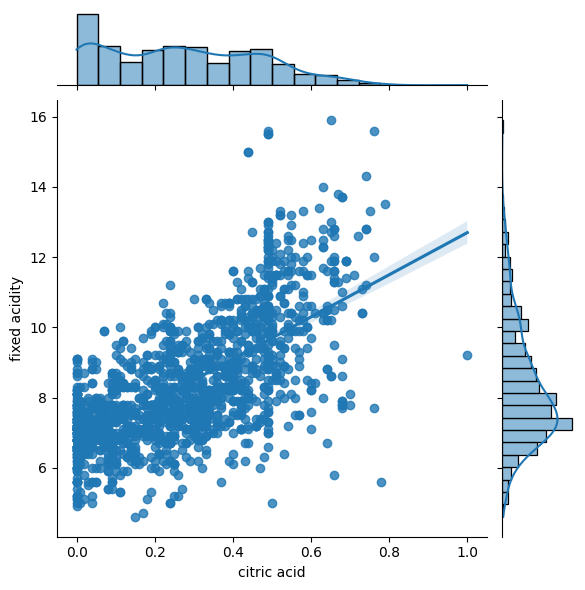

In [6]:
joint_plt = sns.jointplot(y='fixed acidity', x='citric acid', data=df1, kind='reg')

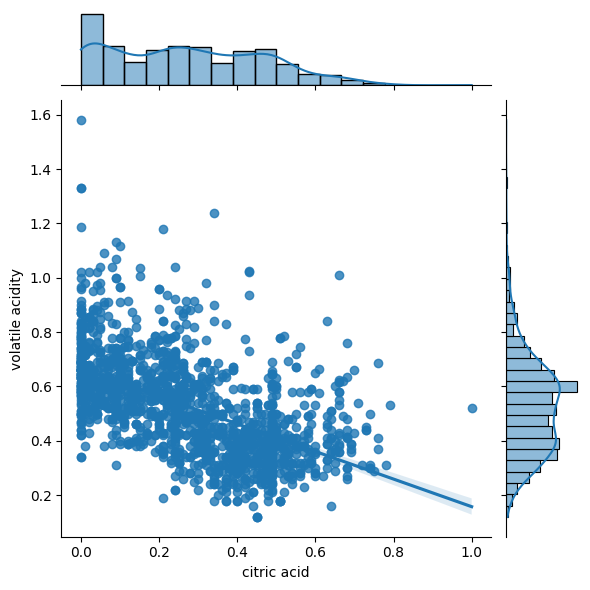

In [7]:
joint_plt = sns.jointplot(y='volatile acidity', x='citric acid', data=df1, kind='reg')



---
# Advanced/Research Assignments
---






##PCA (Principal Component Analysis)
Now let's perform a Principal Component Analysis, like the one done on Notebook 3, but from scratch, with matrix operations.

NOTE: It is strongly recommended to read the following documentations when needed: 

[Numpy](https://https://numpy.org/doc/) for everything related to matrix operations.

[Pandas](https://https://pandas.pydata.org/docs/) for everything regarding DataFrame manipulation

[Python](https://https://docs.python.org/es/3/) for built-in Python functions.

[Seaborn](https://https://seaborn.pydata.org/) for visualizations.

---
To begin, we must first import the following libraries:
* Numpy: for matrix operations
* Seaborn and Matplotlib: for visualizations

Then import both wine datasets: the one for red wines and the one for white wines. After that, add a new column named "hue" that indicates the kind of wine (red or white) and concatenate both dataframes. 
Name the new concatenated dataframe "df_wine"

(this is done on Notebook 3 in the Variable Reduction section).

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['wine']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['wine']='white'

df_wine = pd.concat([df, df2], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Create a new dataframe with the normalized data: 

* Generate a copy of the concatenated dataframe, drop the "quality" and "hue" columns ("quality" is dropped because it's a categorical variable and "hue" is our target variable). Use the `.drop` method. Name it "data_PCA". 

* **Normalizing the data:** 
Calculate the mean of data_pca (you can name it "mean") and the standard deviation of data_pca (you can name it "std") then, subtract the mean from data_pca and divide it by the standard deviation. Name the new dataframe "normalized_data_pca". Print the new dataframe on the screen.

*HINTS:*
useful methods:

`df.copy()`

`df.drop()`

`df.mean()`

`df.std()`

Pandas documentation: https://pandas.pydata.org/docs/


In [9]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'wine'],axis = 1)
mean=data_pca.mean()
std=data_pca.std()
normalized_data_pca=(data_pca-mean)/std
normalized_data_pca

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253


###Transform the dataframe into a matrix to operate:
Transform "normalized_data_pca" into a matrix (numpy array). You should end up with an (n x 11) array, n being the sample size. Name it **C** (because this is our **C**entered data). Make sure **C** is an n x 11 array.

*HINTS:*

useful method: `df.to_numpy()`

Numpy documentation: https://numpy.org/doc/

In [10]:
C=normalized_data_pca.to_numpy()
print(C)
print(C.shape)

[[ 0.1424623   2.18866446 -2.19266376 ...  1.81294997  0.19308191
  -0.91539371]
 [ 0.45100101  3.28198234 -2.19266376 ... -0.11506417  0.99950169
  -0.58002349]
 [ 0.45100101  2.55310376 -1.9174051  ...  0.25809985  0.79789675
  -0.58002349]
 ...
 [-0.5517498  -0.60537011 -0.88518515 ... -1.42113827 -0.47893457
  -0.91539371]
 [-1.32309658 -0.3016707  -0.12822384 ...  0.75565189 -1.01654776
   1.93525315]
 [-0.93742319 -0.78758975  0.42229346 ...  0.25809985 -1.41975765
   1.0968276 ]]
(6497, 11)


###Covariance Matrix:
With Numpy, calculate the covariance matrix of $C^T$ (transposed matrix of **C**). Name the covariaince matrix **V**. 

$V = cov(C^T)$

**V** should be an 11 x 11 array. Check if this is true using a method learned in Notebook 2. 

 The covariance matrix is a square matrix that gives us the covariances between each pair of elements of a vector (or, in this case, each column of a matrix). Remember the covariance is the degree of joint variation of two variables with respect to their means.

*HINTS*:

useful method: `np.cov(A)` <-- generates the covariance matrix of A

Transposed matrix on Numpy: $A^T$ = `A.T `

In [11]:
cV = np.cov(C.T)
V.shape

NameError: name 'V' is not defined

###Eigendecomposition of the covariance matrix:

With Numpy, calculate the eigendecomposition of V. These are the eigenvectors and eigenvalues of V. Name them "vectors" and "values" respectively.

The eigenvectors represent the directions or components for the reduced subspace of the ultimate matrix we want to obtain, whereas the eigenvalues represent the magnitudes for the directions.

**values** should be a vector (array) of 11 components and **vectors** should be a (n x 11) matrix. Check their shapes to make sure this is correct.

*HINTS:*

`np.linalg.eig(A)` calculates the eigendecomposition of matrix A.

Useful link: [this section of the Numpy documentation]((https://https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).)

In [ ]:
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)


[[ 2.38798897e-01  3.36354536e-01 -4.34301304e-01 -3.34679266e-01
  -1.64346214e-01 -2.81267685e-01  3.44056674e-01  1.47480376e-01
   2.04553713e-01  4.01235645e-01 -2.83079440e-01]
 [ 3.80757499e-01  1.17549716e-01  3.07259420e-01 -8.47718098e-02
  -2.12784888e-01  1.52176731e-01 -4.96932675e-01 -1.51455988e-01
   4.92143072e-01 -8.74350885e-02 -3.89159756e-01]
 [-1.52388438e-01  1.83299403e-01 -5.90569674e-01  1.10895136e-03
   2.64300312e-01  2.34463340e-01 -4.02688676e-01  1.55348697e-01
  -2.27633798e-01 -2.93412336e-01 -3.81285036e-01]
 [-3.45919930e-01  3.29914181e-01  1.64688429e-01 -4.49765078e-01
  -1.67443015e-01 -1.37277329e-03  1.08003195e-01  3.53361853e-01
   2.33477754e-01 -5.24872935e-01  2.17975536e-01]
 [ 2.90112586e-01  3.15257992e-01  1.66791047e-02 -4.34375867e-02
   2.44743855e-01 -1.96630217e-01  2.96443716e-01 -6.14391068e-01
  -1.60976388e-01 -4.71516850e-01 -4.60681556e-02]
 [-4.30914008e-01  7.19325988e-02  1.34223949e-01  2.12535052e-04
   3.57278939e-01  

In [ ]:
print(vectors.shape)
print(values.shape)

(11, 11)
(11,)


The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components.

If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.

Let's see this applied to the explained variances per principal component: 


###Explained Variances:
Now let's calculate the explained variances per principal component. This is done by dividing each component from the eigenvalues array by the sum of said components.

Print the result on the screen. This should be an array of numbers that represent the percentage of explained variances per principal component.

If we're lucky, only one or two principal components will be responsible for the most variance in the data. The rest of the components will be close to zero.


*HINTS*:

* First create an empty list called "explained_variances"


* Make a loop so that each i value in **values** is divided by the sum of said values and append each result to the previous list.

useful method: `np.sum(A)` <-- returns the sum of the components in A


In [ ]:
#Explained variance by principal component:
explained_variances = [] #Empty list

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances), '\n', explained_variances)


1.0 
 [0.2754426044142342, 0.22671145702012307, 0.14148608664196258, 0.002984618386615865, 0.08823200715191047, 0.02069961495083526, 0.030638549581105214, 0.06544317417745857, 0.055210155535374485, 0.04559184457610461, 0.047559887564275795]


In the previous cell, we should see an array where the first two elements are higher in value than the rest. We will consider these two are responsible for most of the variance in the data, and we will take them as our principal components. 

###Generating principal components:
Now we will name our principal components 
 "projected_1" and "projected_2". 
* Projected_1 will be our matrix C multiplied by the first row of our **vectors** matrix.
* Projected_2 will be our matrix C multiplied by the second row of **vectors**.

Create a dataframe called "res" with projected_1 along a column named 'PC1', projected_2 along a column called 'PC2', and the type of wine (or "hue") on another column called 'Y'

You should obtain a dataframe like this one:  

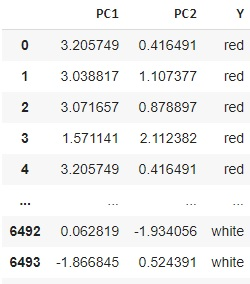


*HINTS:*

Dot product on Numpy: $A \cdot B$ = `A.dot(B)`

Remember that multiplying a matrix  $A$ by the n-th row of a matrix $B$ is the same as multiplying something by the m-th column of $B^T$

In [ ]:
projected_1 = C.dot(vectors.T[0])
projected_2 = C.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = df_wine['wine']
res

,PC1,PC2,Y
0,3.205749,0.416491,red
1,3.038817,1.107377,red
2,3.071657,0.878897,red
3,1.571141,2.112382,red
4,3.205749,0.416491,red
...,...,...,...
6492,0.062819,-1.934056,white
6493,-1.866845,0.524391,white
6494,-0.571089,-0.722606,white
6495,-0.090045,-3.545507,white


We should now have our principal components. Now let's try plotting our PCA graph:

###Generating a visualization:
Generate a Seaborn scatterplot that shows:

* "Column PC1" plotted on the x-axis
* "Column PC2" multiplied by n (n being the sample size) plotted on the y-axis.
* different hues on the data points for the different categories on the 'Y' column (different hue according to the type of wine). 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


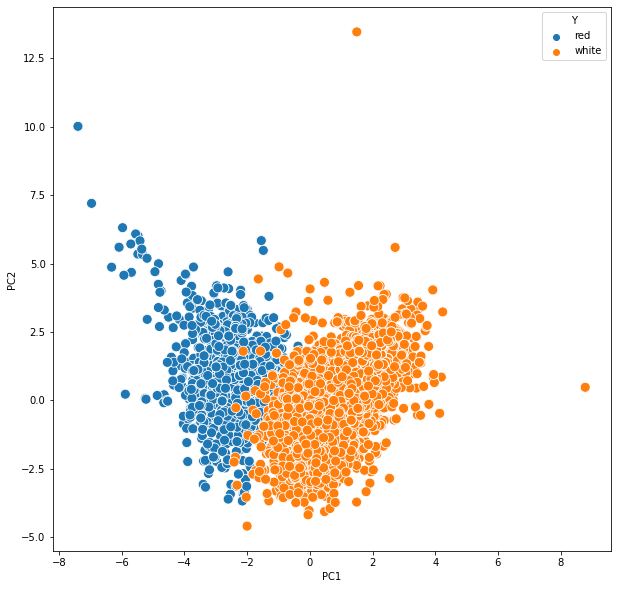

In [ ]:
plt.figure(figsize=(10, 10))
#sns.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['Y'], s=100)
sns.scatterplot(-res['PC1'], res['PC2'], hue=res['Y'], s=100)

Look at the generated plot and compare it to the one obtained for PCA calculated with sklearn on notebook 3: 

In [ ]:
#Lo mismo, pero con sklearn, copiado del Notebook 3:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'wine'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)

<Figure size 432x288 with 0 Axes>

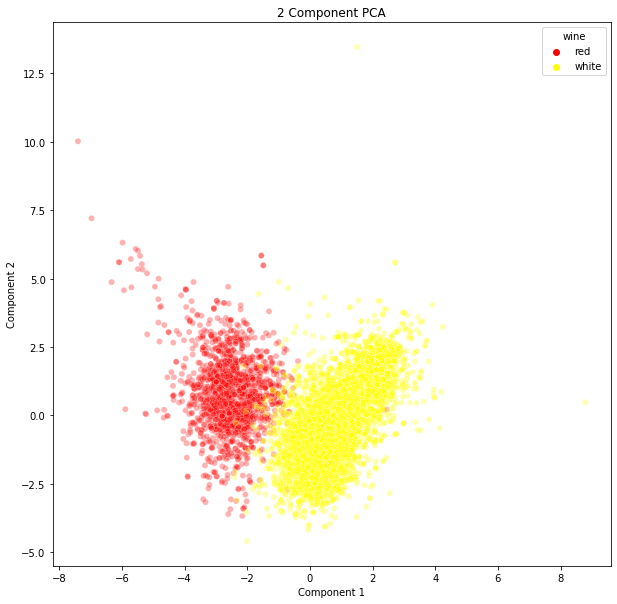

In [ ]:
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['wine']=df_wine['wine']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['wine'],
                alpha=0.3,palette=["red", "yellow"])